[View in Colaboratory](https://colab.research.google.com/github/kwullum/Data-Science-Projects/blob/master/Catplus_No_Finance_Just_Forbrukslan.ipynb)

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
import io
%matplotlib inline

# Data on aggregate level

- This dataset runs from Jan 2016 - Dec 2017.
- This data is not client specific, but aggregate weekly data (using cat+).
- Seasonality around Easter 2016 & 2017, which fall on weeks 12 and 67. Christmas holidays fall on weeks 52 and 104. Weeks 28 and 81 is fellesferien. 
- ** Bank Norwegian decreses spending throughout weeks 58 - 64, with the larrgest decrease in WEEK 60. **

In [0]:
uploaded = files.upload()

Saving ASCIIweekly.csv to ASCIIweekly.csv


In [0]:
uploaded

{u'ASCIIweekly.csv': '\xff\xfeS\x00t\x00a\x00r\x00t\x00D\x00a\x00t\x00e\x00\t\x00E\x00n\x00d\x00D\x00a\x00t\x00e\x00\t\x00N\x00e\x00t\x00w\x00o\x00r\x00k\x00/\x00P\x00r\x00o\x00p\x00e\x00r\x00t\x00y\x00\t\x00D\x00e\x00v\x00i\x00c\x00e\x00\t\x00G\x00e\x00o\x00I\x00D\x00\t\x00G\x00e\x00o\x00\t\x00Q\x00u\x00e\x00r\x00y\x00S\x00e\x00t\x00\t\x00I\x00m\x00p\x00r\x00e\x00s\x00s\x00i\x00o\x00n\x00s\x00\t\x00C\x00l\x00i\x00c\x00k\x00s\x00\t\x00P\x00a\x00g\x00e\x00 \x00C\x00T\x00R\x00\t\x00C\x00o\x00s\x00t\x00 \x00U\x00S\x00D\x00\t\x00C\x00P\x00C\x00 \x00U\x00S\x00D\x00\t\x00R\x00P\x00M\x00a\x00d\x00\t\x00Q\x00u\x00e\x00r\x00i\x00e\x00s\x00\t\x00M\x00a\x00t\x00c\x00h\x00e\x00d\x00 \x00Q\x00u\x00e\x00r\x00i\x00e\x00s\x00\t\x00C\x00o\x00v\x00e\x00r\x00a\x00g\x00e\x00\t\x00I\x00P\x00Q\x00\t\x00D\x00e\x00p\x00t\x00h\x00\t\x00q\x00C\x00T\x00R\x00\t\x00R\x00P\x00M\x00q\x00\t\x00R\x00P\x00M\x00m\x00q\x00\n\x002\x000\x001\x006\x00-\x000\x001\x00-\x000\x003\x00\t\x002\x000\x001\x006\x00-\x000\x001\x00-\x

In [0]:
# The file name needs to contain 'ASCII' for it to work

df = pd.read_csv(io.StringIO(uploaded['ASCIIweekly.csv'].decode('utf-16')), delimiter='\t')

# Add column with week number
df.insert(1, 'Week number', range(1, 1 + len(df)))
df.set_index('Week number', inplace=True)
df.head()

,StartDate,EndDate,Network/Property,Device,GeoID,Geo,QuerySet,Impressions,Clicks,Page CTR,...,CPC USD,RPMad,Queries,Matched Queries,Coverage,IPQ,Depth,qCTR,RPMq,RPMmq
Week number,,,,,,,,,,,,,,,,,,,,,
1,2016-01-03,2016-01-09,Google search (excluding search partners),All devices,2578,Norway,Lån > Forbrukslån,87243,4425,41.37,...,27.2465,1381.9515,10813,10695,98.91,8.07,8.16,40.92,11150.0592,11273.0800
2,2016-01-10,2016-01-16,Google search (excluding search partners),All devices,2578,Norway,Lån > Forbrukslån,91830,4535,39.43,...,26.8727,1327.1033,11625,11502,98.94,7.90,7.98,39.01,10483.2602,10595.3660
3,2016-01-17,2016-01-23,Google search (excluding search partners),All devices,2578,Norway,Lån > Forbrukslån,98133,5076,41.33,...,27.4751,1421.1689,12414,12283,98.94,7.91,7.99,40.89,11234.3781,11354.1943
4,2016-01-24,2016-01-30,Google search (excluding search partners),All devices,2578,Norway,Lån > Forbrukslån,102409,5146,40.55,...,26.5081,1332.0169,12835,12690,98.87,7.98,8.07,40.09,10628.0112,10749.4502
5,2016-01-31,2016-02-06,Google search (excluding search partners),All devices,2578,Norway,Lån > Forbrukslån,108836,5497,41.38,...,26.2661,1326.6271,13398,13283,99.14,8.12,8.19,41.03,10776.5925,10869.8928


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


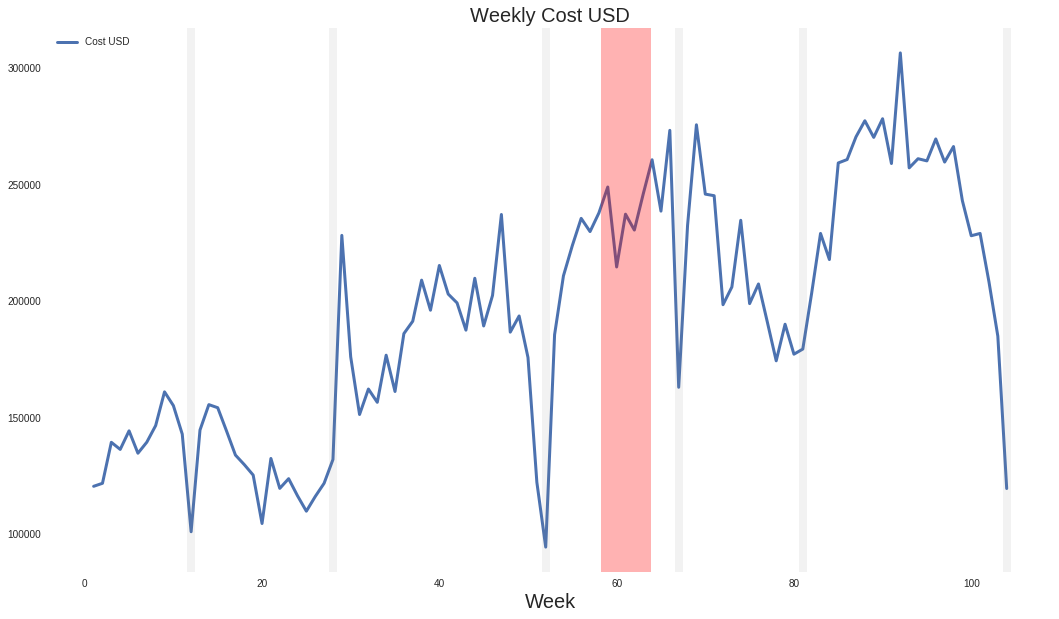

In [0]:
fig, ax = plt.subplots()

CostUSD = df[['Cost USD']]
plt.xlabel('Week', fontsize=20)
plt.title('Weekly Cost USD', fontsize=20)

plt.plot(CostUSD, linewidth=3)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.legend(['Cost USD'])

fig.patch.set_facecolor('white')
plt.gca().set_axis_bgcolor('white')

ax.axvline(x=61, ymin=0, ymax=35000, color='red', lw=50, alpha=0.3) # Bank Norwegian decrease bids
ax.axvline(x=12, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=52, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=67, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=28, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=81, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=104, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)

plt.show()

Text(0.5,1,u'First differences of Cost USD data')

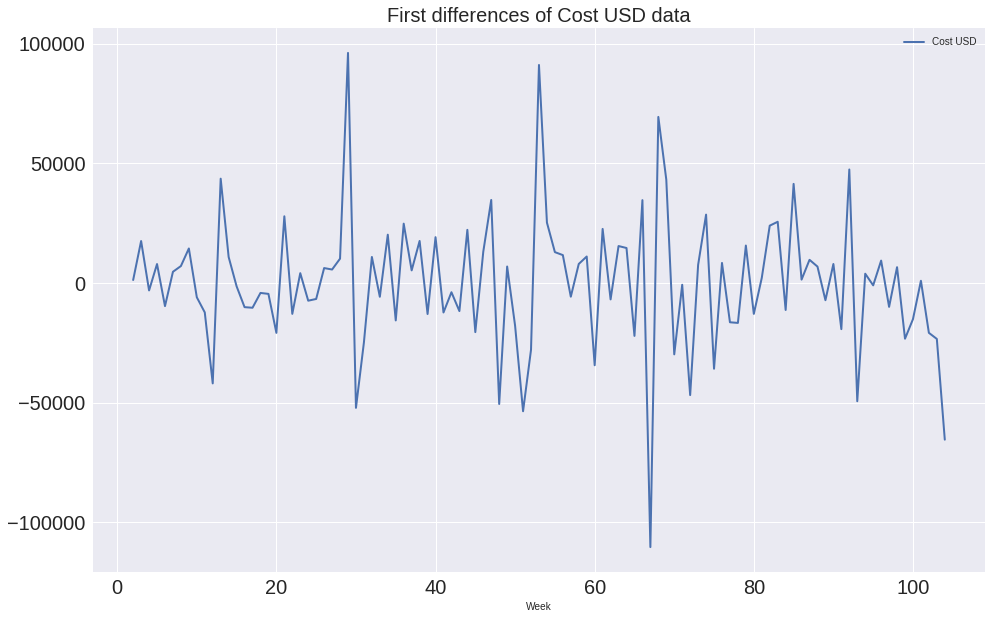

In [0]:
# First differencing is another way of stabilising the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality. 

CostUSD.diff().plot(figsize=(16,10), linewidth=2, fontsize=20, grid=True)
plt.xlabel('Week', fontsize=10);
plt.title('First differences of Cost USD data', fontsize=20)

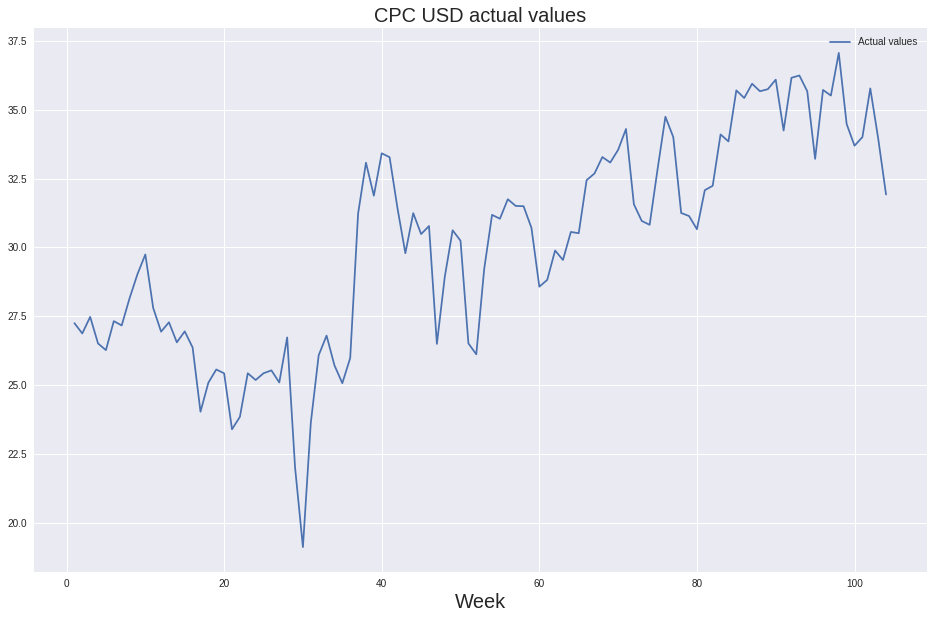

In [0]:
CPCUSD = df[['CPC USD']]
plt.xlabel('Week', fontsize=20);

plt.plot(CPCUSD)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)
plt.title('CPC USD actual values', fontsize=20)
plt.legend(['Actual values'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  del sys.path[0]


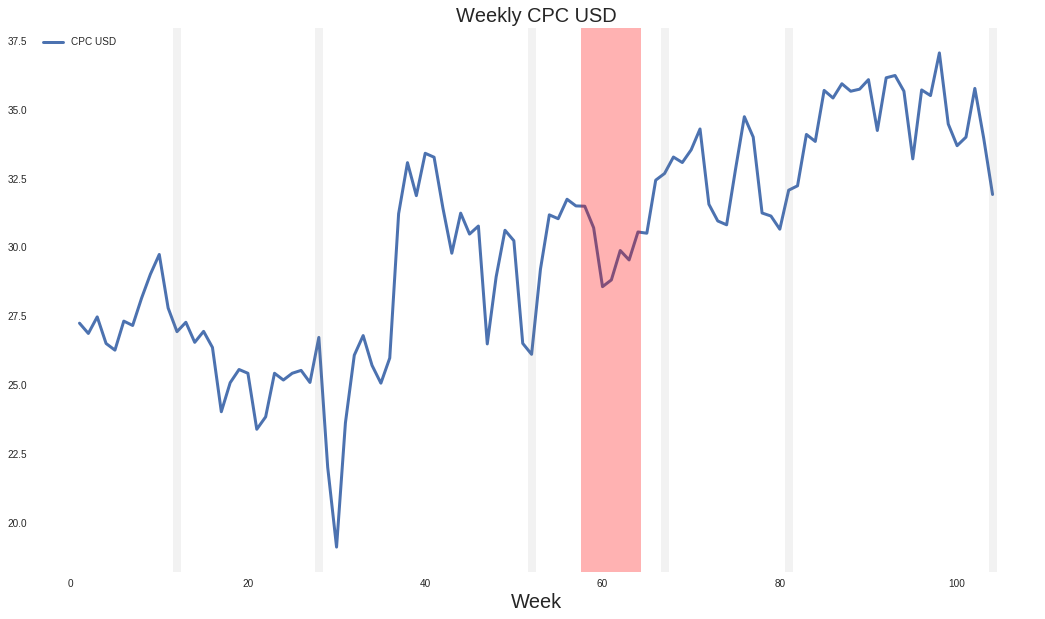

In [0]:
fig, ax = plt.subplots()
CPCUSD = df[['CPC USD']]
plt.xlabel('Week', fontsize=20)
plt.title('Weekly CPC USD', fontsize=20)

plt.plot(CPCUSD, linewidth=3)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.legend(['CPC USD'])

fig.patch.set_facecolor('white')
plt.gca().set_axis_bgcolor('white')

ax.axvline(x=61, ymin=0, ymax=35000, color='red', lw=60, alpha=0.3) # Bank Norwegian decrease bids
ax.axvline(x=12, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=52, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=67, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=28, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=81, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=104, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)

plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  del sys.path[0]


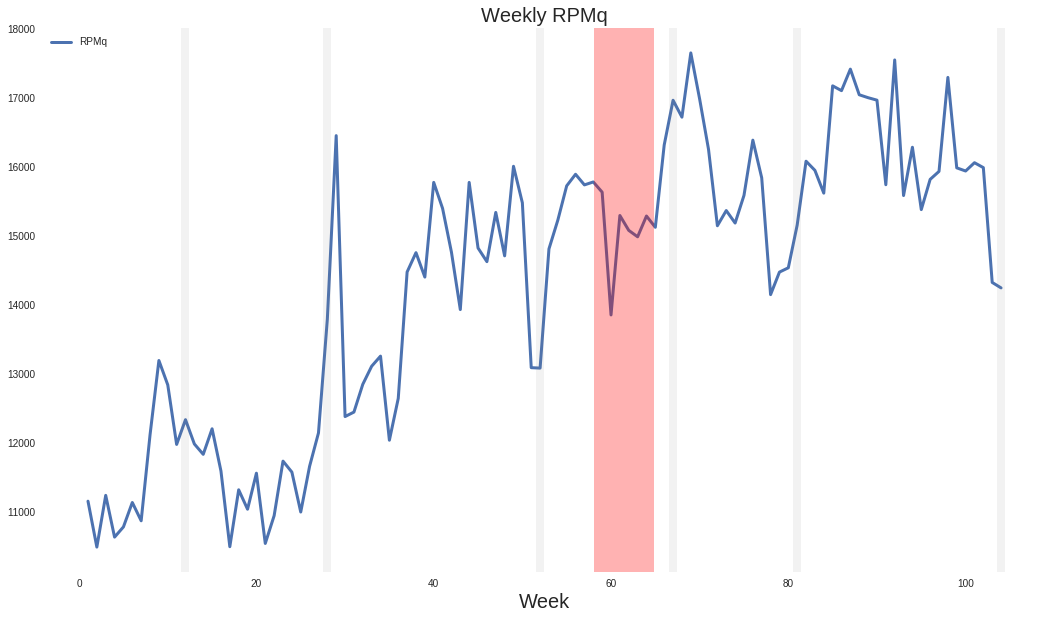

In [0]:
fig, ax = plt.subplots()
RPMq = df[['RPMq']]
plt.xlabel('Week', fontsize=20);

plt.plot(RPMq, linewidth=3)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.title('Weekly RPMq', fontsize=20)
plt.legend(['RPMq'])

fig.patch.set_facecolor('white')
plt.gca().set_axis_bgcolor('white')

ax.axvline(x=61.5, ymin=0, ymax=35000, color='red', lw=60, alpha=0.3) # Bank Norwegian decrease bids
ax.axvline(x=12, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=52, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=67, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=28, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=81, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=104, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)

plt.show()



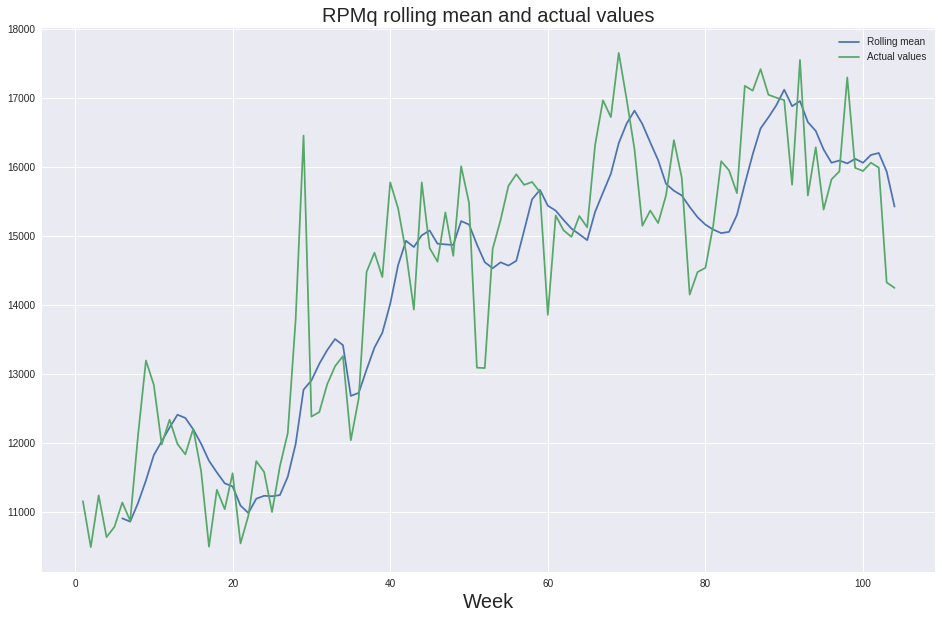

In [0]:
RPMq = df[['RPMq']]
plt.xlabel('Week', fontsize=20);

plt.plot(RPMq.rolling(6).mean())
plt.plot(RPMq)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(16, 10)
plt.title('RPMq rolling mean and actual values', fontsize=20)
plt.legend(['Rolling mean', 'Actual values'])

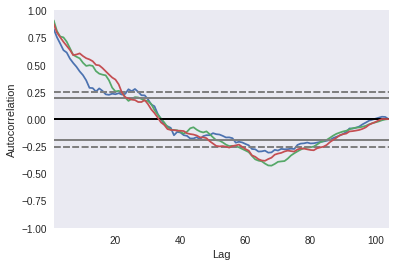

In [0]:
pd.plotting.autocorrelation_plot(CostUSD)
pd.plotting.autocorrelation_plot(CPCUSD)
pd.plotting.autocorrelation_plot(RPMq)

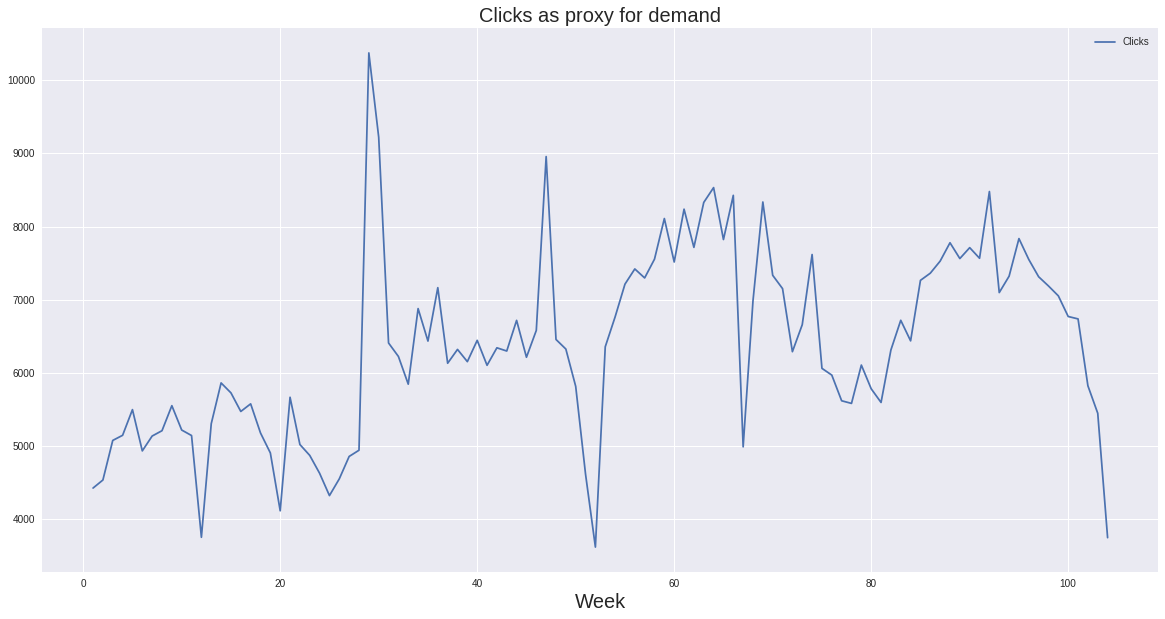

In [0]:
demand = df[['Clicks']]
plt.xlabel('Week', fontsize=20);

plt.plot(demand)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 10)
plt.title('Clicks as proxy for demand', fontsize=20)
plt.legend(['Clicks'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  from ipykernel import kernelapp as app


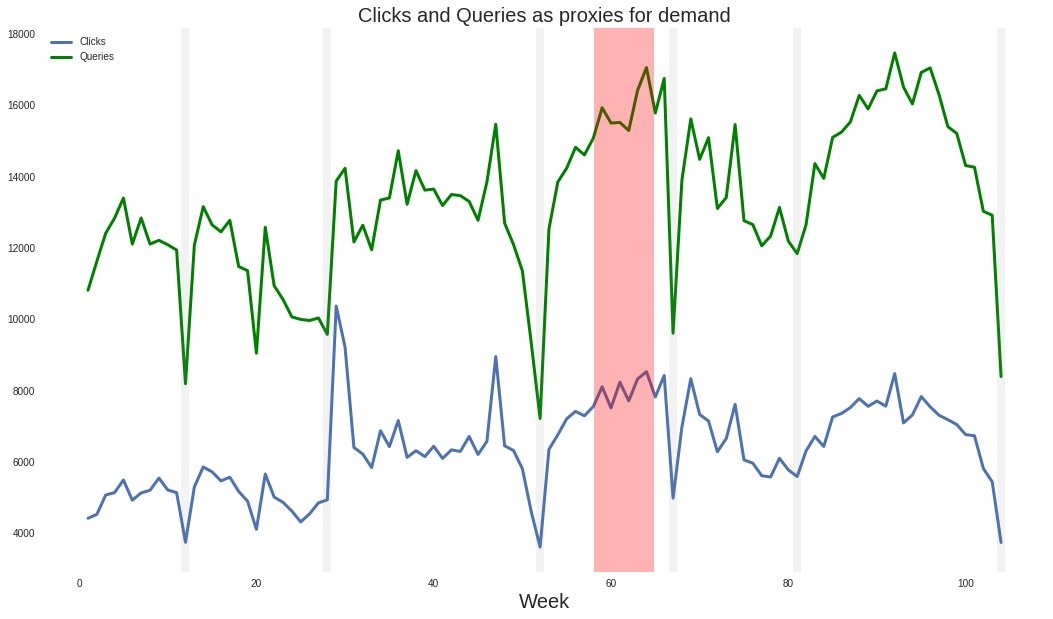

In [0]:
fig, ax = plt.subplots()
demand = df[['Clicks']]
queries = df[['Queries']]
plt.xlabel('Week', fontsize=20)
plt.title('Clicks and Queries as proxies for demand', fontsize=20)

plt.plot(demand, linewidth=3)
plt.plot(queries, linewidth=3, color='g')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.legend(['Clicks', 'Queries'])

fig.patch.set_facecolor('white')
plt.gca().set_axis_bgcolor('white')

ax.axvline(x=61.5, ymin=0, ymax=35000, color='red', lw=60, alpha=0.3) # Bank Norwegian decrease bids
ax.axvline(x=12, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=52, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=67, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=28, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=81, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=104, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)

plt.show()

# Data on client level

- This dataset spans a different time period than the previous one (Jan 2017 - June 2018).
- Data is clients specific, and Bank Norwegian's 7 closest competitors have been chosen. 
- Easter, Christmas and fellesferien fall on weeks 15, 28, 52, 65.
- **Bank Norwegian decreases spending in weeks 6 - 12, with the largest decrease in WEEK 8.**

In [0]:
uploaded2 = files.upload()

Saving ASCIIclientsWeekly.csv to ASCIIclientsWeekly.csv


In [0]:
uploaded2

{u'ASCIIclientsWeekly.csv': '\xff\xfeS\x00t\x00a\x00r\x00t\x00D\x00a\x00t\x00e\x00\t\x00E\x00n\x00d\x00D\x00a\x00t\x00e\x00\t\x00N\x00e\x00t\x00w\x00o\x00r\x00k\x00/\x00P\x00r\x00o\x00p\x00e\x00r\x00t\x00y\x00\t\x00G\x00e\x00o\x00I\x00D\x00\t\x00G\x00e\x00o\x00\t\x00E\x00n\x00t\x00i\x00t\x00y\x00I\x00D\x00\t\x00E\x00n\x00t\x00i\x00t\x00y\x00\t\x00Q\x00u\x00e\x00r\x00y\x00S\x00e\x00t\x00\t\x00I\x00m\x00p\x00r\x00e\x00s\x00s\x00i\x00o\x00n\x00s\x00\t\x00C\x00l\x00i\x00c\x00k\x00s\x00\t\x00a\x00d\x00C\x00T\x00R\x00\t\x00C\x00o\x00s\x00t\x00 \x00U\x00S\x00D\x00\t\x00C\x00P\x00C\x00 \x00U\x00S\x00D\x00\t\x00R\x00P\x00M\x00a\x00d\x00\t\x00C\x00o\x00s\x00t\x00 \x00U\x00S\x00D\x00 \x00f\x00i\x00x\x00e\x00d\x00-\x00F\x00X\x00\t\x00C\x00P\x00C\x00 \x00U\x00S\x00D\x00 \x00f\x00i\x00x\x00e\x00d\x00-\x00F\x00X\x00\t\x00A\x00v\x00g\x00 \x00I\x00m\x00p\x00r\x00 \x00P\x00o\x00s\x00\t\x00A\x00v\x00g\x00 \x00C\x00l\x00i\x00c\x00k\x00 \x00P\x00o\x00s\x00\t\x00C\x00l\x00i\x00c\x00k\x00C\x00o\x00v\x00e\x00

In [0]:
wdf = pd.read_csv(io.StringIO(uploaded2['ASCIIclientsWeekly.csv'].decode('utf-16')), delimiter='\t')
wdf.head()

,StartDate,EndDate,Network/Property,GeoID,Geo,EntityID,Entity,QuerySet,Impressions,Clicks,adCTR,Cost USD,CPC USD,RPMad,Cost USD fixed-FX,CPC USD fixed-FX,Avg Impr Pos,Avg Click Pos,ClickCoverage,ShareOfVoice
0,2017-01-01,2017-01-07,Google search (excluding search partners),2578,Norway,co103797,Sparebank 1 Gruppen > BN Bank,Lån > Forbrukslån,534,39,7.30,1214.93,31.1522,2275.1572,1728.62,44.3235,3.81,2.31,0.0052,0.0054
1,2017-01-01,2017-01-07,Google search (excluding search partners),2578,Norway,co1333228,YA Bank,Lån > Forbrukslån,5176,302,5.83,14705.28,48.6930,2841.0512,21111.19,69.9046,3.76,2.51,0.0400,0.0523
2,2017-01-01,2017-01-07,Google search (excluding search partners),2578,Norway,co1426399,Moore Credit,Lån > Forbrukslån,520,29,5.58,239.48,8.2579,460.5373,307.31,10.5968,5.55,3.52,0.0038,0.0053
3,2017-01-01,2017-01-07,Google search (excluding search partners),2578,Norway,co1685300,Gjensidige Forsikring > OPP Finans,Lån > Forbrukslån,4102,855,20.84,25496.09,29.8200,6215.5254,36609.07,42.8176,2.08,1.40,0.1134,0.0414
4,2017-01-01,2017-01-07,Google search (excluding search partners),2578,Norway,co1815369,Leads - leads.as,Lån > Forbrukslån,3433,153,4.46,2553.13,16.6871,743.7026,3663.34,23.9434,4.27,2.53,0.0203,0.0347


In [0]:
# How many unique clients are there?

uniquevalues = np.unique(wdf[['Entity']].values)
uniquevalues

array(['Axo - Axofinans.no', 'Bank Norwegian', 'Bank2',
       'Canica > Komplett Group > Komplett Bank', 'DNB', 'Eika Alliansen',
       'Ekspres Bank', 'Gjensidige Forsikring',
       'Gjensidige Forsikring > OPP Finans',
       'Grupo Santander > Santander Consumer Bank', 'Instabank',
       'Leads - leads.as', 'Leasy 1 > LEASY', 'Mono Bank', 'Moore Credit',
       'North Media > Lead Supply', 'Reitan Gruppen > REMA Insurance',
       'Sampo Group > If', 'Schibsted > Lendo', 'Skandia',
       'Sparebank 1 Gruppen > BN Bank',
       'Sparebank 1 Gruppen > Eiendomsmegler 1',
       'Sparebank 1 Gruppen > Sparebank 1', 'Storebrand',
       'Svea Ekonomi > Svea Finance', 'Swedbank Group > EnterCard',
       'Tribe Venneforsikring', 'YA Bank', 'Zmarta Group',
       'testerne - testerne.no'], dtype=object)

In [0]:
# Making separate dataframes for the relevant clients

df1 = wdf[wdf['Entity'] == 'Bank Norwegian']
df2 = wdf[wdf['Entity'] == 'Axo - Axofinans.no']
df3 = wdf[wdf['Entity'] == 'Canica > Komplett Group > Komplett Bank']
df4 = wdf[wdf['Entity'] == 'Gjensidige Forsikring > OPP Finans']
df5 = wdf[wdf['Entity'] == 'Schibsted > Lendo']
df6 = wdf[wdf['Entity'] == 'Grupo Santander > Santander Consumer Bank']
df7 = wdf[wdf['Entity'] == 'Mono Bank']
df8 = wdf[wdf['Entity'] == 'Sparebank 1 Gruppen > BN Bank']


In [0]:
# Adding week number columns to each client's dataset, and making it the index

clients = [df1, df2, df3, df4, df5, df6, df7, df8]

for x in clients:
  x.insert(1, 'Week number', range(1, 1 + len(x)))
  x.set_index('Week number', inplace=True)

In [0]:
ClientsName = ['Bank Norwegian - Cost USD', 'Axo Finans - Cost USD', 'Komplett Bank - Cost USD', 'Gjensidige - Cost USD','Lendo - Cost USD', 'Santander - Cost USD', 'Mono Bank - Cost USD', 'Sparebank 1 - Cost USD']
ClientsCostUSD = [df1[['Cost USD']], df2[['Cost USD']], df3[['Cost USD']], df4[['Cost USD']], df5[['Cost USD']], df6[['Cost USD']], df7[['Cost USD']], df8[['Cost USD']]]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  


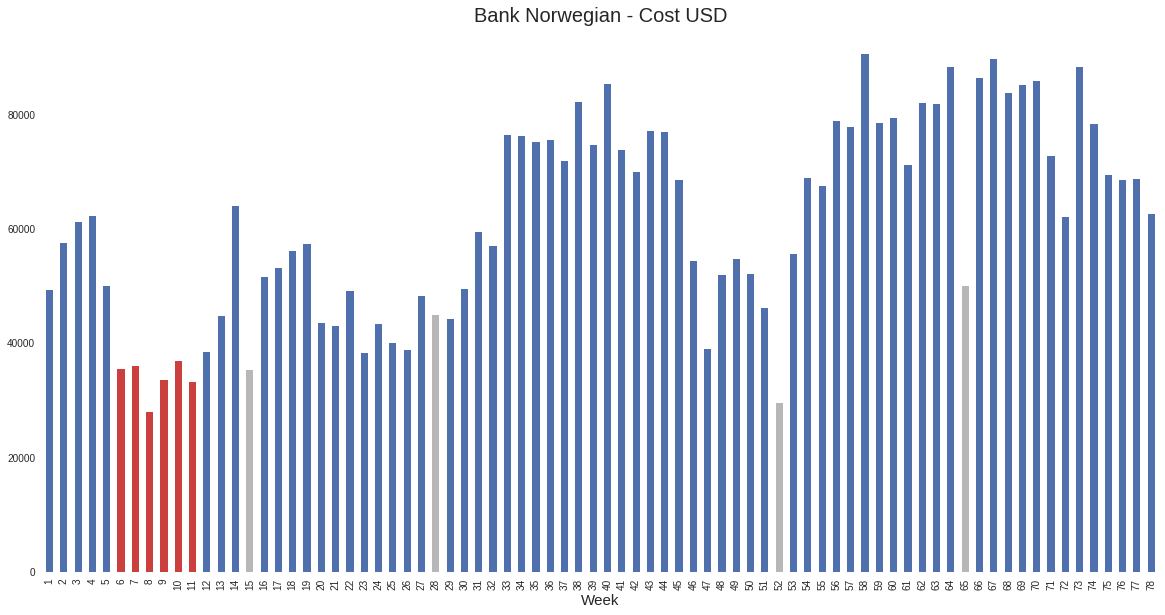

In [0]:
fig, ax = plt.subplots()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 10)
fig.patch.set_facecolor('white')
plt.gca().set_axis_bgcolor('white')

bar = df1['Cost USD'].plot(linewidth=0.2, fontsize=10, kind='bar', color='#4F70AC')

highlight6 = 6
pos = df.index.get_loc(highlight6)
ax.patches[pos].set_facecolor('#cc3f3f')
highlight7 = 7
pos = df.index.get_loc(highlight7)
ax.patches[pos].set_facecolor('#cc3f3f')
highlight = 8
pos = df.index.get_loc(highlight)
ax.patches[pos].set_facecolor('#cc3f3f')
highlight9 = 9
pos = df.index.get_loc(highlight9)
ax.patches[pos].set_facecolor('#cc3f3f')
highlight10 = 10
pos = df.index.get_loc(highlight10)
ax.patches[pos].set_facecolor('#cc3f3f')
highlight11 = 11
pos = df.index.get_loc(highlight11)
ax.patches[pos].set_facecolor('#cc3f3f')

holiday1 = 15
pos1 = df.index.get_loc(holiday1)
ax.patches[pos1].set_facecolor('#b7b7b7')
holiday2 = 28
pos2 = df.index.get_loc(holiday2)
ax.patches[pos2].set_facecolor('#b7b7b7')
holiday3 = 52
pos3 = df.index.get_loc(holiday3)
ax.patches[pos3].set_facecolor('#b7b7b7')
holiday4 = 65
pos4 = df.index.get_loc(holiday4)
ax.patches[pos4].set_facecolor('#b7b7b7')


plt.xlabel('Week', fontsize=15) 
plt.title('Bank Norwegian - Cost USD', fontsize=20)

plt.show()

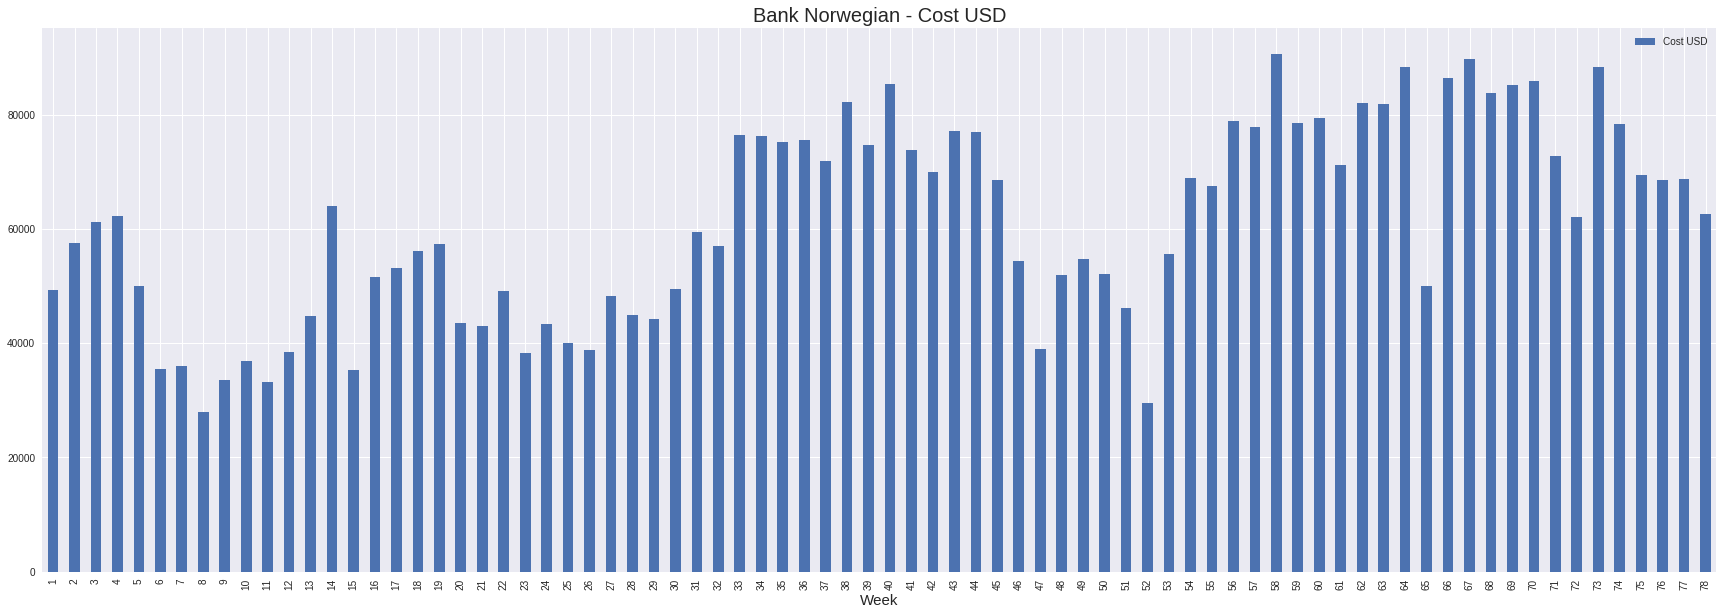

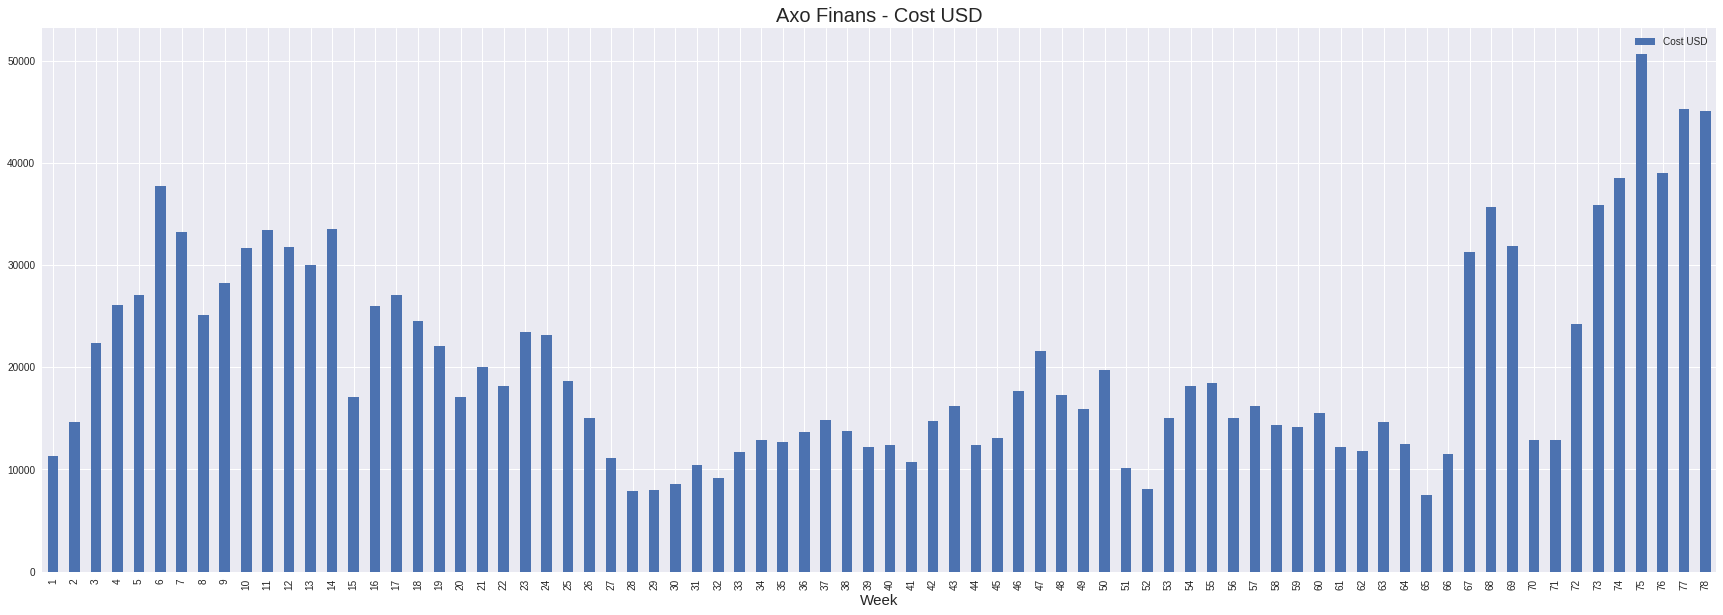

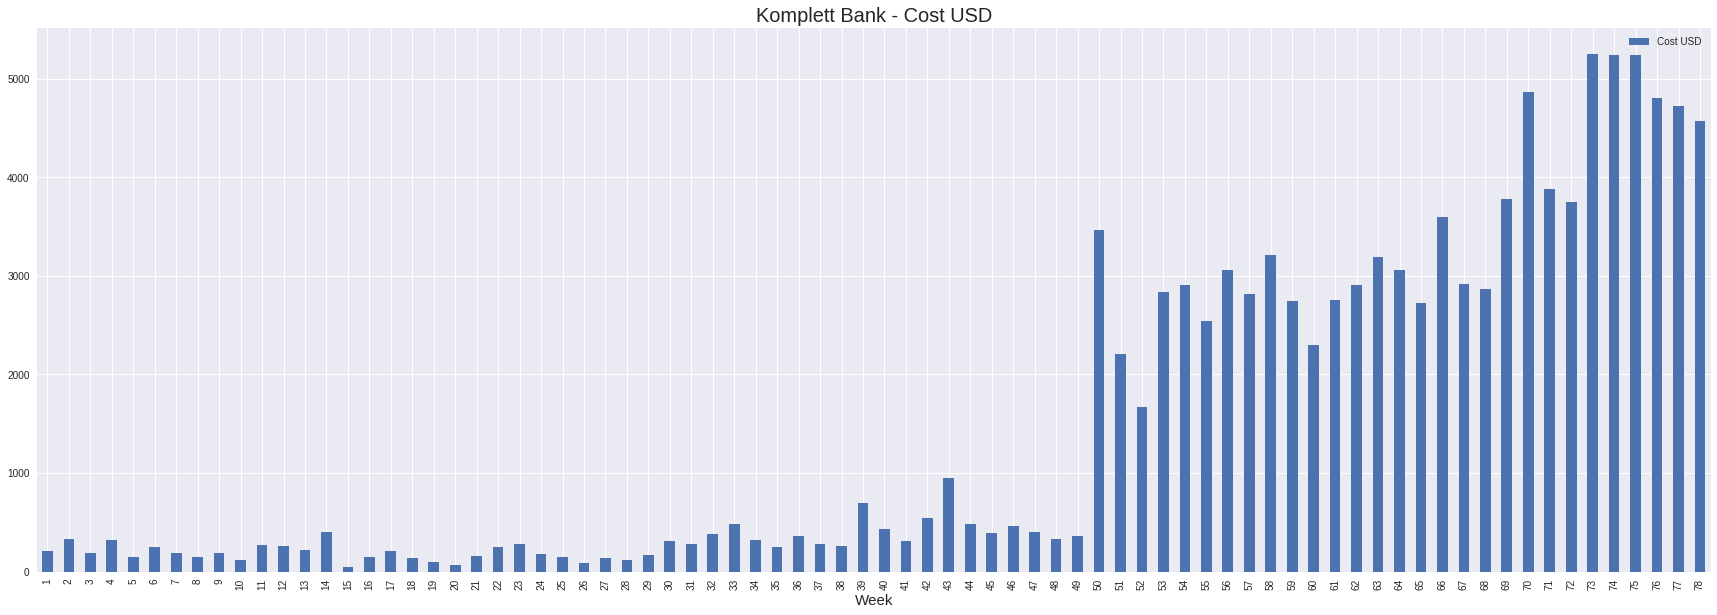

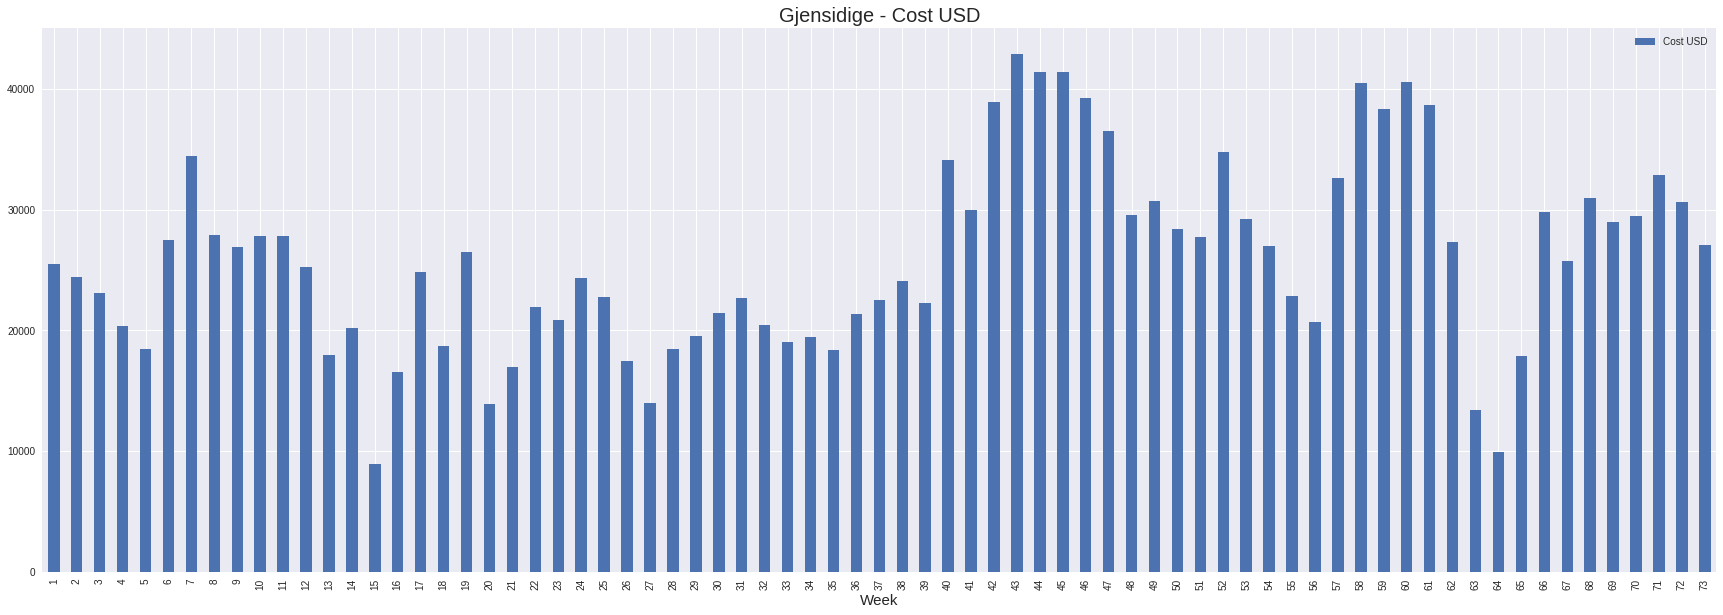

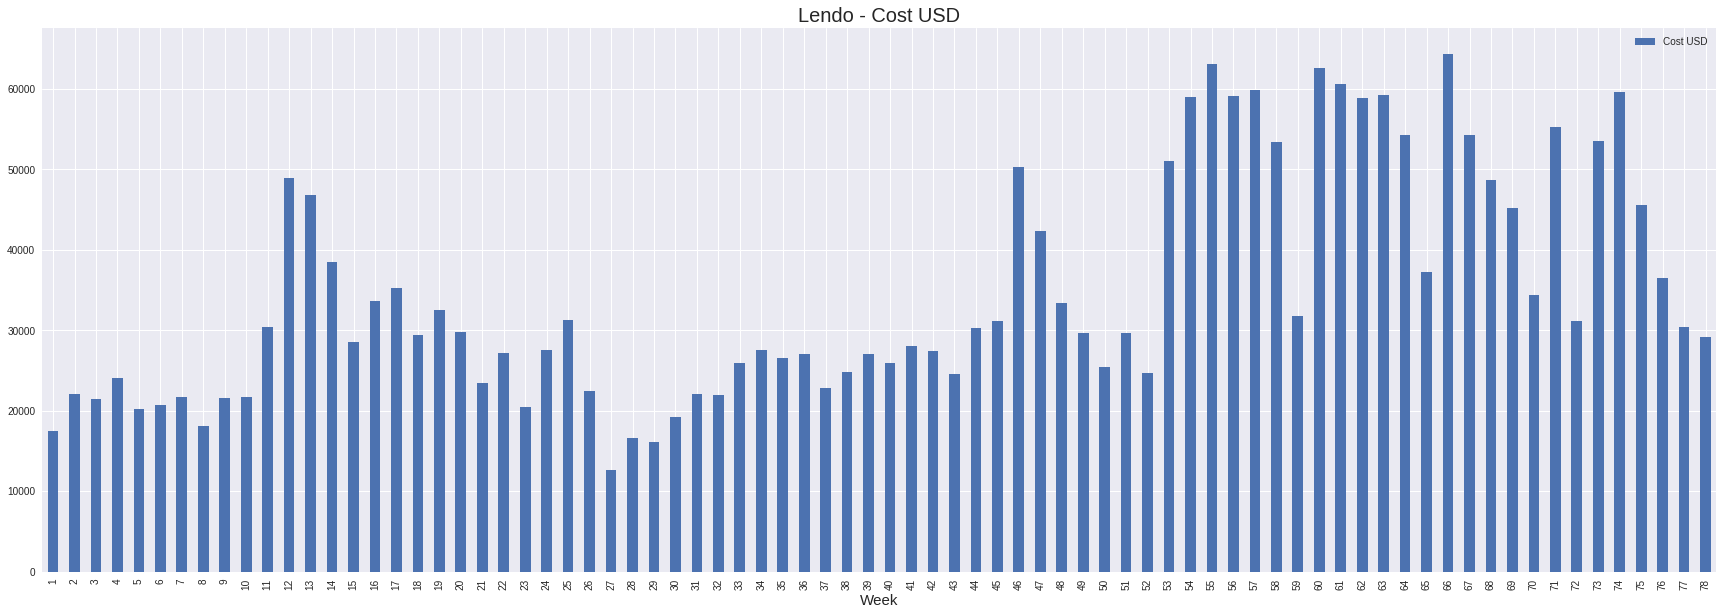

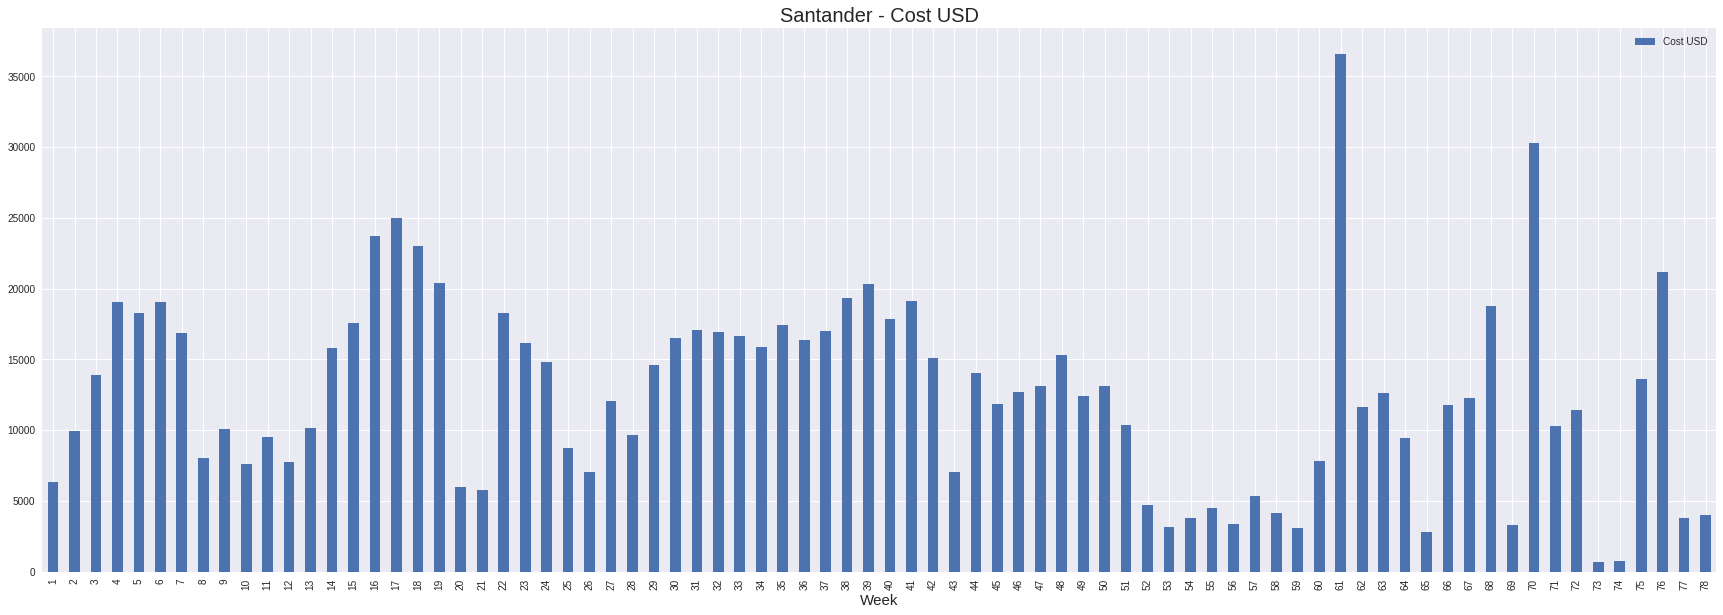

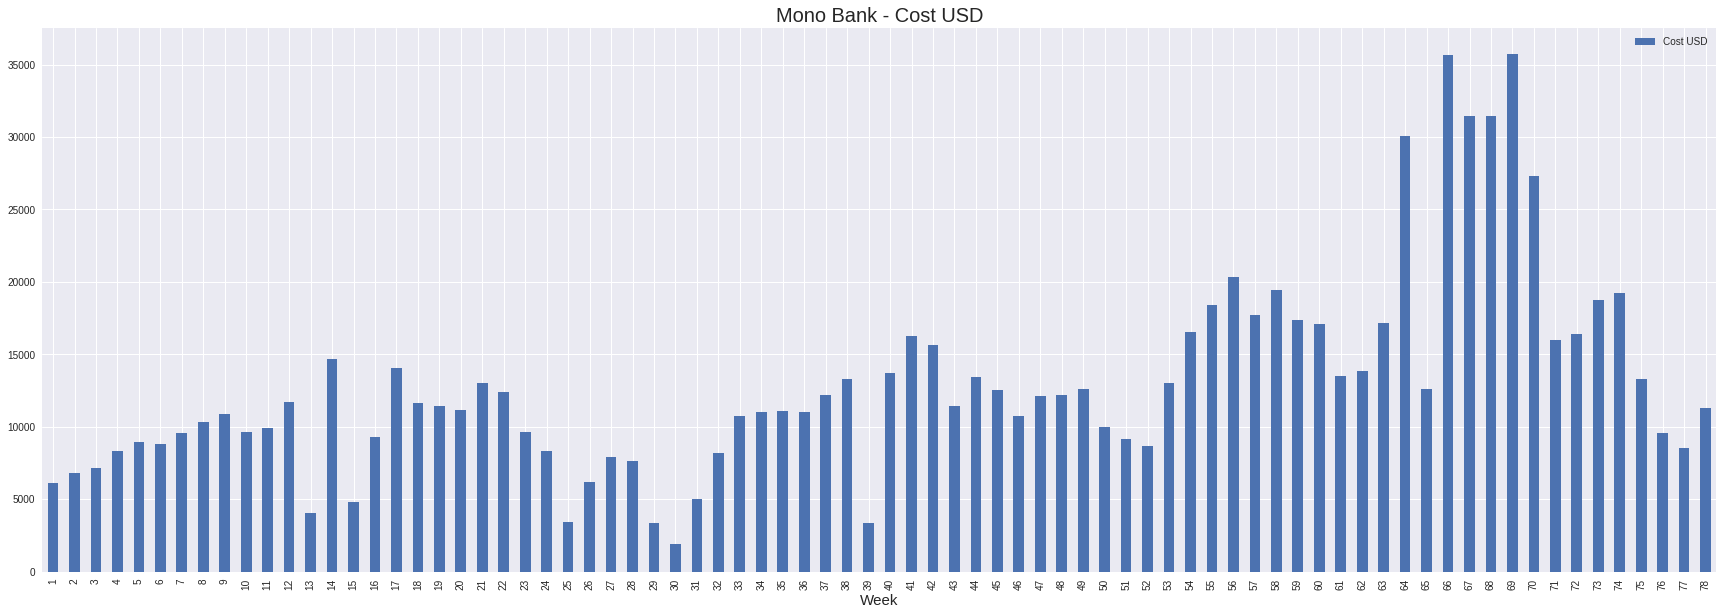

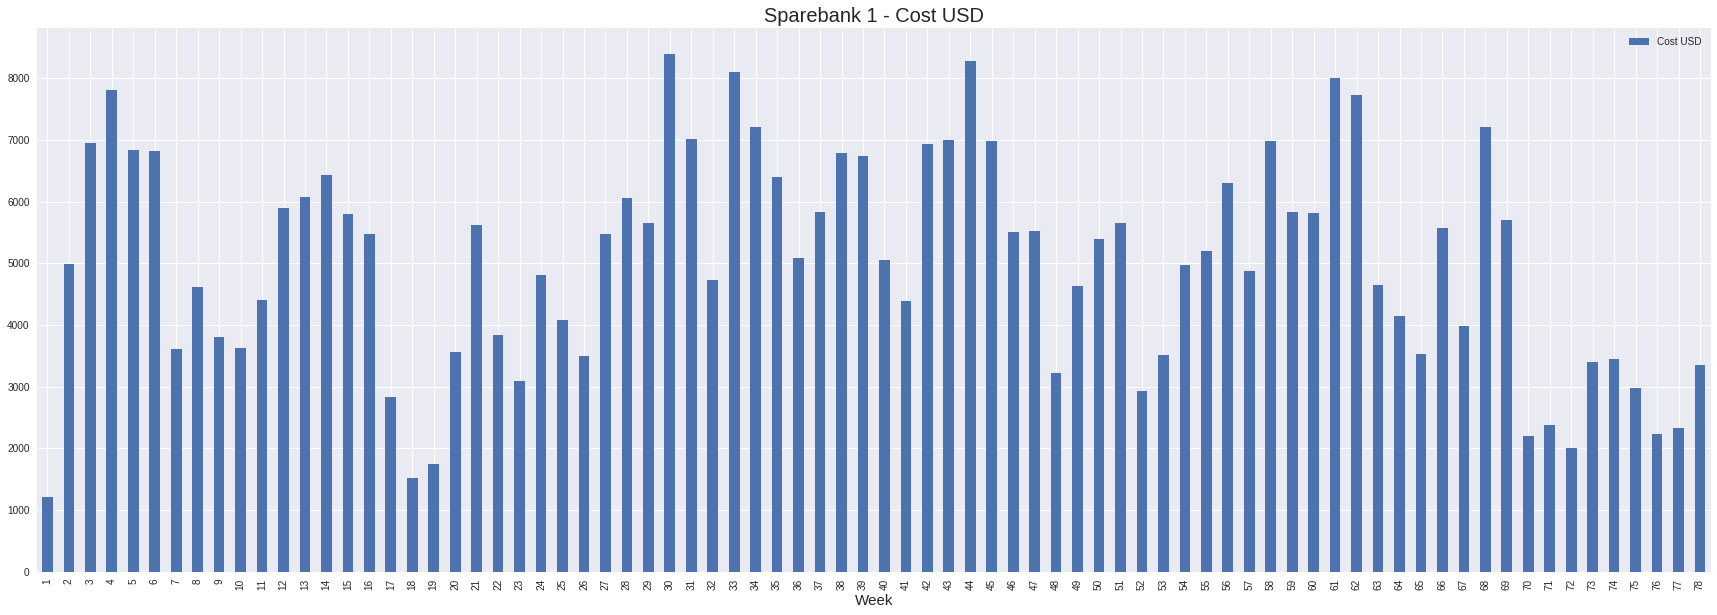

In [0]:
# Cost USD for all relevant clients

for x, i in zip(ClientsCostUSD, ClientsName):
  bar = x.plot(figsize=(30,10), linewidth=0.2, fontsize=10, kind='bar')
  plt.xlabel('Week', fontsize=15) 
  plt.title(i, fontsize=20)

- Bank Norwegian decreases spending during the weeks 6 - 12. 
- Santander is the only client that seems to follow BN's footsteps. 

In [0]:
# Normalizing the data on a [0,1] scale for comparison using sklearn library
from sklearn import preprocessing

In [0]:
# Fetching just the first 20 weeks for each client

just_df1 = df1.loc[0:20, ['Cost USD']]
just_df2 = df2.loc[0:20, ['Cost USD']]
just_df3 = df3.loc[0:20, ['Cost USD']]
just_df4 = df4.loc[0:20, ['Cost USD']]
just_df5 = df5.loc[0:20, ['Cost USD']]
just_df6 = df6.loc[0:20, ['Cost USD']]
just_df7 = df7.loc[0:20, ['Cost USD']]
just_df8 = df8.loc[0:20, ['Cost USD']]

In [0]:
# Normalizing the data

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(just_df1)
just_df1_normalized = pd.DataFrame(np_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(just_df2)
just_df2_normalized = pd.DataFrame(np_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(just_df3)
just_df3_normalized = pd.DataFrame(np_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(just_df4)
just_df4_normalized = pd.DataFrame(np_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(just_df5)
just_df5_normalized = pd.DataFrame(np_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(just_df6)
just_df6_normalized = pd.DataFrame(np_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(just_df7)
just_df7_normalized = pd.DataFrame(np_scaled)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(just_df8)
just_df8_normalized = pd.DataFrame(np_scaled)

In [0]:
just_df1_normalized.head()

,0
0,0.594119
1,0.822075
2,0.920630
3,0.950164
4,0.609090


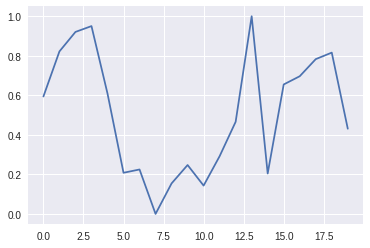

In [0]:
plt.plot(just_df1_normalized)

In [0]:
# Add all the justs into one dataset.

just = [just_df1, just_df2, just_df3, just_df4, just_df5, just_df6, just_df7, just_df8]

In [0]:
just_final = df_final = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True), just)
just_final

,Cost USD_x,Cost USD_y,Cost USD_x,Cost USD_y,Cost USD_x,Cost USD_y,Cost USD_x,Cost USD_y
Week number,,,,,,,,
1,49382.68,11280.59,208.54,25496.09,17480.50,6337.93,6114.77,1214.93
2,57607.75,14651.34,327.80,24460.71,22024.89,9912.48,6780.45,4985.13
3,61163.79,22337.36,185.73,23058.04,21488.87,13926.23,7171.53,6952.07
4,62229.41,26049.86,317.00,20395.24,24024.48,19062.06,8306.13,7805.80
5,49922.85,27073.32,144.70,18452.78,20225.48,18286.68,8938.77,6842.25
6,35456.94,37758.78,245.80,27481.81,20730.35,19020.71,8805.03,6822.84
7,36057.20,33240.87,186.77,34481.57,21661.95,16880.97,9565.28,3601.38
8,27945.75,25053.63,145.97,27918.60,18134.85,7994.69,10292.17,4615.03
9,33511.06,28265.61,191.98,26895.71,21554.04,10108.28,10878.52,3809.28


In [0]:
# Add column names

just_final.columns = ['Bank Norwegian', 'Axo Finans', 'Komplett Bank', 'Gjensidige', 'Lendo', 'Santander', 'Mono Bank', 'Sparebank 1']
just_final

,Bank Norwegian,Axo Finans,Komplett Bank,Gjensidige,Lendo,Santander,Mono Bank,Sparebank 1
Week number,,,,,,,,
1,49382.68,11280.59,208.54,25496.09,17480.50,6337.93,6114.77,1214.93
2,57607.75,14651.34,327.80,24460.71,22024.89,9912.48,6780.45,4985.13
3,61163.79,22337.36,185.73,23058.04,21488.87,13926.23,7171.53,6952.07
4,62229.41,26049.86,317.00,20395.24,24024.48,19062.06,8306.13,7805.80
5,49922.85,27073.32,144.70,18452.78,20225.48,18286.68,8938.77,6842.25
6,35456.94,37758.78,245.80,27481.81,20730.35,19020.71,8805.03,6822.84
7,36057.20,33240.87,186.77,34481.57,21661.95,16880.97,9565.28,3601.38
8,27945.75,25053.63,145.97,27918.60,18134.85,7994.69,10292.17,4615.03
9,33511.06,28265.61,191.98,26895.71,21554.04,10108.28,10878.52,3809.28


In [0]:
# Add a week number column

just_final['Week number'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
just_final

,Bank Norwegian,Axo Finans,Komplett Bank,Gjensidige,Lendo,Santander,Mono Bank,Sparebank 1,Week number
Week number,,,,,,,,,
1,49382.68,11280.59,208.54,25496.09,17480.50,6337.93,6114.77,1214.93,1
2,57607.75,14651.34,327.80,24460.71,22024.89,9912.48,6780.45,4985.13,2
3,61163.79,22337.36,185.73,23058.04,21488.87,13926.23,7171.53,6952.07,3
4,62229.41,26049.86,317.00,20395.24,24024.48,19062.06,8306.13,7805.80,4
5,49922.85,27073.32,144.70,18452.78,20225.48,18286.68,8938.77,6842.25,5
6,35456.94,37758.78,245.80,27481.81,20730.35,19020.71,8805.03,6822.84,6
7,36057.20,33240.87,186.77,34481.57,21661.95,16880.97,9565.28,3601.38,7
8,27945.75,25053.63,145.97,27918.60,18134.85,7994.69,10292.17,4615.03,8
9,33511.06,28265.61,191.98,26895.71,21554.04,10108.28,10878.52,3809.28,9


In [0]:
dfs = [just_df1_normalized, just_df2_normalized, just_df3_normalized, just_df4_normalized, just_df5_normalized, just_df6_normalized, just_df7_normalized, just_df8_normalized]

In [0]:
from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True), dfs)

In [0]:
df_final.columns = ['Bank Norwegian', 'Axo Finans', 'Komplett Bank', 'Gjensidige', 'Lendo', 'Santander', 'Mono Bank', 'Sparebank 1']
df_final

,Bank Norwegian,Axo Finans,Komplett Bank,Gjensidige,Lendo,Santander,Mono Bank,Sparebank 1
0,0.594119,0.000000,0.453962,0.648668,0.000000,0.019979,0.195246,0.000000
1,0.822075,0.127303,0.797008,0.608185,0.144506,0.207514,0.257750,0.572034
2,0.920630,0.417580,0.388350,0.553341,0.127461,0.418091,0.294471,0.870468
3,0.950164,0.557790,0.765943,0.449225,0.208090,0.687537,0.401004,1.000000
4,0.609090,0.596443,0.270329,0.373275,0.087287,0.646857,0.460406,0.853805
5,0.208171,1.000000,0.561139,0.726310,0.103341,0.685367,0.447848,0.850860
6,0.224807,0.829372,0.391342,1.000000,0.132965,0.573108,0.519232,0.362084
7,0.000000,0.520165,0.273982,0.743388,0.020807,0.106899,0.587483,0.515880
8,0.154241,0.641472,0.406328,0.703393,0.129533,0.217786,0.642539,0.393628
9,0.247320,0.768977,0.188091,0.741229,0.133247,0.085056,0.524439,0.366742


In [0]:
df_final['Week number'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


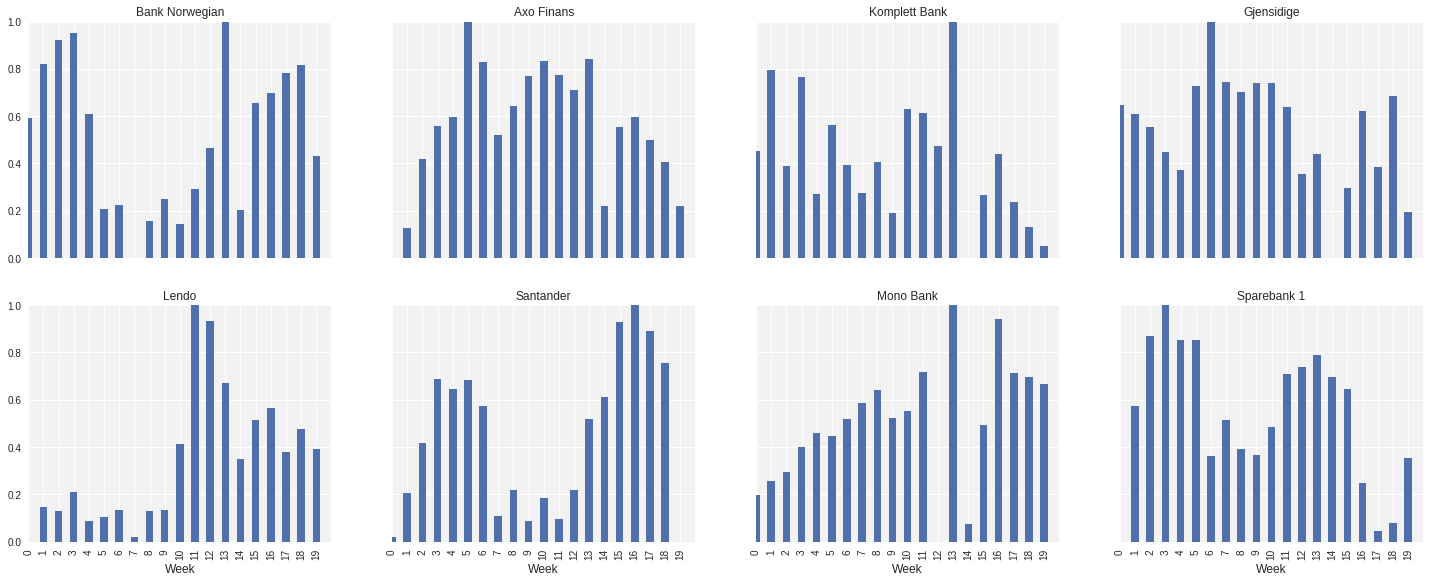

In [0]:
# EXPERIMENTING2
# df1['Cost USD'].plot(linewidth=0.2, fontsize=10, kind='bar', color='#4F70AC')

# Initialize the figure
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('Set1')

fig, ax = plt.subplots()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(25, 20)

# multiple line plot
num=0
for column in df_final.drop('Week number', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(4,4, num)

    # Plot the lineplot
    df_final[column].plot(linewidth=0.2, fontsize=10, kind='bar', color='#4F70AC')
    
    # Same limits for everybody!
    plt.xlim(0,20)
    plt.ylim(0,1)
    
    # Not ticks everywhere
    if num in range(1,5) :
        plt.tick_params(labelbottom='off')
    if num in range(5,9) :
        plt.xlabel('Week', fontsize=12) 
    if num not in [1,5] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='center', fontsize=12, fontweight=0)
    #plt.xlabel('Week', fontsize=10) 
    
    fig.patch.set_facecolor('white')
    plt.gca().set_axis_bgcolor('#f2f2f2')

    
plt.show()


In [0]:
# Run the cells below last, as they will mess up the index otherwise. 

In [0]:
# Adding aggregate week number column so that the x-axis match between the client data (starting Jan 2016) and the aggregate data (starting Jan 2017).

df1.insert(1, 'Aggregate week number', range(53, 53 + len(df1)))
df1.set_index('Aggregate week number', inplace=True)
df1.head()

,StartDate,EndDate,Network/Property,GeoID,Geo,EntityID,Entity,QuerySet,Impressions,Clicks,adCTR,Cost USD,CPC USD,RPMad,Cost USD fixed-FX,CPC USD fixed-FX,Avg Impr Pos,Avg Click Pos,ClickCoverage,ShareOfVoice
Aggregate week number,,,,,,,,,,,,,,,,,,,,
53,2017-01-01,2017-01-07,Google search (excluding search partners),2578,Norway,co40124,Bank Norwegian,Lån > Forbrukslån,10850,946,8.72,49382.68,52.2016,4551.3993,70797.27,74.8386,1.68,1.27,0.1254,0.1096
54,2017-01-08,2017-01-14,Google search (excluding search partners),2578,Norway,co40124,Bank Norwegian,Lån > Forbrukslån,11878,1031,8.68,57607.75,55.8756,4849.9536,82133.74,79.6641,1.83,1.29,0.1289,0.1103
55,2017-01-15,2017-01-21,Google search (excluding search partners),2578,Norway,co40124,Bank Norwegian,Lån > Forbrukslån,11960,1149,9.61,61163.79,53.2322,5114.0290,86486.12,75.2708,1.86,1.28,0.1348,0.1090
56,2017-01-22,2017-01-28,Google search (excluding search partners),2578,Norway,co40124,Bank Norwegian,Lån > Forbrukslån,12496,1170,9.36,62229.41,53.1875,4979.9465,86730.38,74.1285,1.99,1.36,0.1339,0.1094
57,2017-01-29,2017-02-04,Google search (excluding search partners),2578,Norway,co40124,Bank Norwegian,Lån > Forbrukslån,12031,1039,8.64,49922.85,48.0489,4149.5178,68847.73,66.2635,2.30,1.56,0.1206,0.1050


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  app.launch_new_instance()


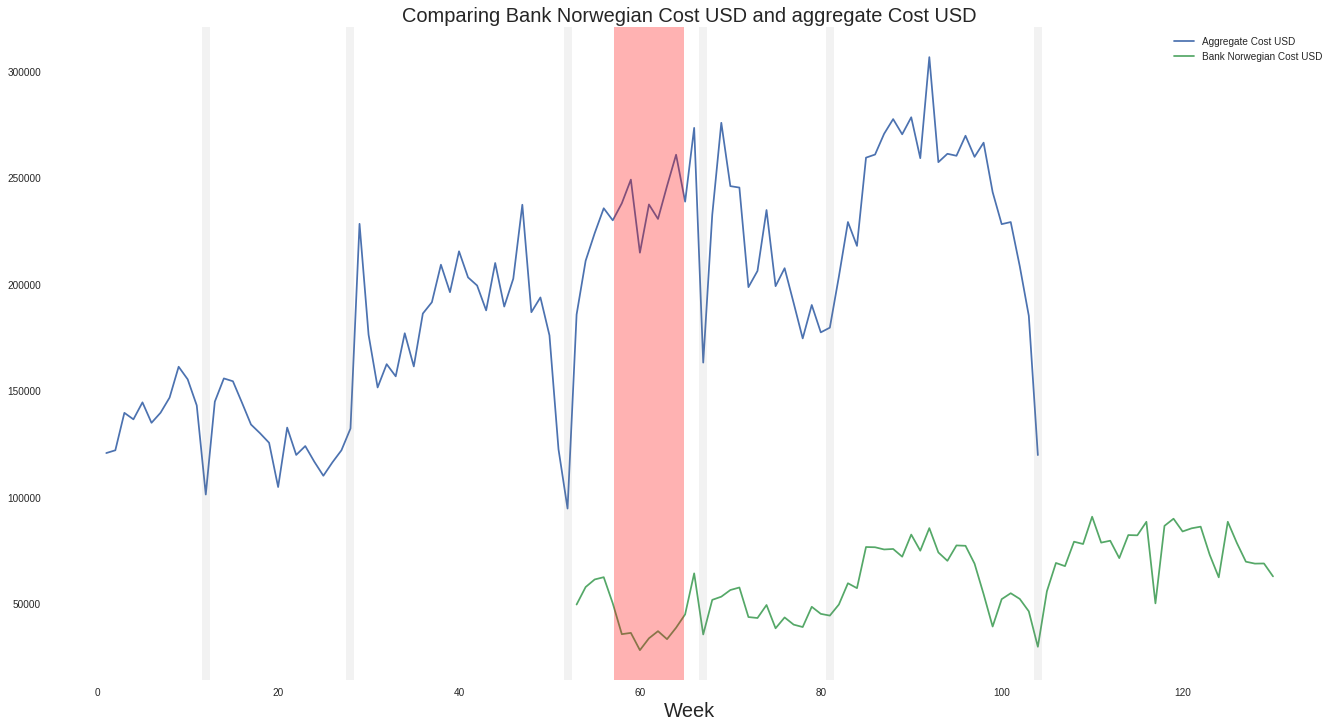

In [0]:
fig, ax = plt.subplots()

agg = df['Cost USD']
cliBN = df1['Cost USD']

plt.plot(agg)
plt.plot(cliBN)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(23, 12)
plt.title('Comparing Bank Norwegian Cost USD and aggregate Cost USD', fontsize=20)
plt.xlabel('Week', fontsize=20)
plt.legend(['Aggregate Cost USD', 'Bank Norwegian Cost USD'])

fig.patch.set_facecolor('white')
plt.gca().set_axis_bgcolor('white')

ax.axvline(x=61, ymin=0, ymax=35000, color='red', lw=70, alpha=0.3) # Bank Norwegian decrease bids
ax.axvline(x=12, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=52, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=67, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=28, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=81, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)
ax.axvline(x=104, ymin=0, ymax=35000, color='grey', lw=8, alpha=0.1)

plt.show()
